## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px
import math

## Loading in data

In [2]:
# Load the data in and check the preliminary data.
df_data = pd.read_csv('games.csv')
display(df_data)
display(df_data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [3]:
# Check all the data columns and perform any fixes.
# 1. Lowercase all the column names.
df_data.columns = df_data.columns.str.lower()
print(df_data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [ ]:
# 2. Convert the data to the required types.
df_data[['name','platform','genre','rating']] = df_data[['name','platform','genre','rating']].astype(str)
df_data['year_of_release'] = df_data['year_of_release'].astype('Int64')
display(df_data.info())
display(df_data)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
I made sure name, platform, genre, rating were strings. And converted year_of_release to int instead of a float. I left the critic score as a float. User score needs to be converted to a float and then multiplied by 10 to match the formatting for the critic score in case additional analysis needs to be done.
</div>

In [9]:
# Checking for duplicates
duplicates_entries = df_data[df_data.duplicated()]
print(duplicates_entries)

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [13]:
# No duplicates found. Checking the categories for genre and rating
genre_counts = df_data['genre'].value_counts()
display(genre_counts)
rating_counts = df_data['rating'].value_counts()
display(rating_counts)

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
nan                2
Name: count, dtype: int64

rating
nan     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
There does not appear to be any errors in either of the columns categories. Changing them to lower-case. May need to put rating on a numerical scale in order to graph later.
</div>

In [19]:
df_data['genre'] = df_data['genre'].str.lower()
df_data['rating'] = df_data['rating'].str.lower()
display(df_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,nan
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,nan
16711,LMA Manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,nan
16712,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,nan
16713,Spirits & Spells,GBA,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,nan


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
I noticed the critic score is on a percentile and the user score is out of ten. I will convert the user score to a percentile in a new column in order to be able to have the scores work.
</div>

In [18]:
# Converting user_score and adding modified user score column.
df_data['user_score'] = pd.to_numeric(df_data['user_score'], errors='coerce')
df_data['mod_user_score'] = df_data['user_score'] * 10
display(df_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mod_user_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,80.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nan,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,83.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,nan,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,nan,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,nan,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,nan,NaN


In [19]:
# Double check the NAN values
nan_counts = df_data.isna().sum()
display(nan_counts)

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
mod_user_score     9125
dtype: int64

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
I am leaving the year of release, critic score, and user score column nan values alone for now. Will come back and conver them to average score or 0s depending on the need later. I suspect many of the scores that are missing are because the game is a very minorly released game or for some of the larger games, it looks like they pre-date the use of the internet that would collect the critic and user scores such as Super Mario Bros.
</div>

In [21]:
# Checking for TBD values.
tbd_counts = (df_data == 'TBD').sum()
display(tbd_counts)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
mod_user_score     0
dtype: Int64

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
No values of TBD were found but if there are some I find later, I will convert them to NaN for this project since I will not be able to get addtional data.
</div>

In [22]:
# Adding a total sales column
df_data['total_sales'] = df_data['na_sales'] + df_data['jp_sales'] + df_data['eu_sales'] + df_data['other_sales']
display(df_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,mod_user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,80.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nan,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,83.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,nan,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,nan,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,nan,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,nan,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,nan,NaN,0.01


## Sales data analysis

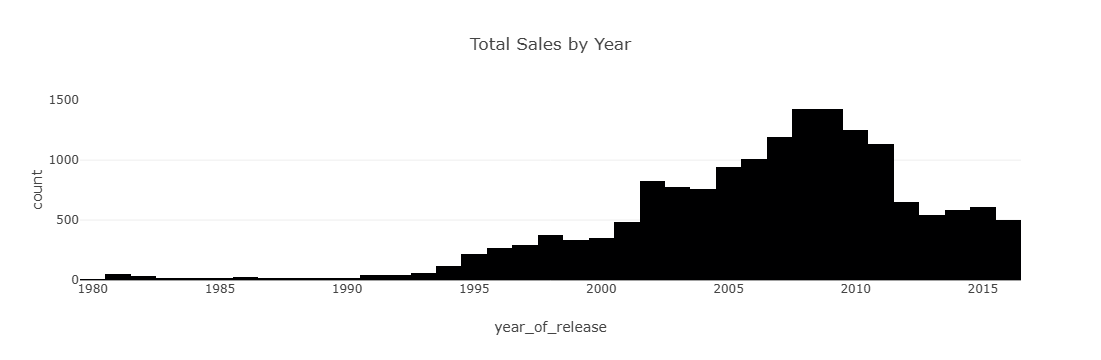

In [27]:
# Checking out games released by year
fig = px.histogram(df_data, x='year_of_release', title='Total Sales by Year')
fig.show()


In [30]:
# Checking out sales by year of release.
sales_by_year = df_data.groupby('year_of_release')['total_sales'].sum()
df_sales_by_year = sales_by_year.reset_index()
display(df_sales_by_year)

,year_of_release,total_sales
0,1980,11.38
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,37.08
7,1987,21.70
8,1988,47.21
9,1989,73.45
